In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Path Data

In [2]:
path_data = '../data/data combined (aqcin)/combined aqicn data (all german cities).csv'

In [3]:
df_data_all_cities = pd.read_csv(path_data)

In [4]:
df_data_all_cities.head()

,date,city,pm25,pm10
0,2014-08-13,munich,,15
1,2014-08-14,munich,,15
2,2014-08-15,munich,,14
3,2014-08-16,munich,,9
4,2014-08-17,"dresden-bergstraße,-germany",,10


In [5]:
df_data_all_cities['date'] = pd.to_datetime(df_data_all_cities['date'])
df_data_all_cities.sort_values(by='date', ascending=True, inplace=True)
df_data_all_cities.rename(columns={' pm10':'pm10', ' pm25':'pm25'}, inplace=True)
df_data_all_cities.replace(' ', np.nan, inplace=True) 
df_data_all_cities['pm10'] = pd.to_numeric(df_data_all_cities['pm10']) # , downcast='float'
df_data_all_cities['pm25'] = pd.to_numeric(df_data_all_cities['pm25']) # , downcast='float'
df_data_all_cities.replace({'munich':'Munich','berlin,-germany':'Berlin',
            'potsdam-zentrum,-germany':'Potsdam',
            'hannover,-germany':'Hannover',
            'stuttgart-bad-cannstatt, germany':'Stuttgart',
            'dresden-bergstraße,-germany':'Dresden',
            'sternschanze,-hamburg, germany':'Hamburg',
            'frankfurt-schwanheim,-germany':'Frankfurt',
            'kiel-bahnhofstr.-verk., schleswig-holstein, germany':'Kiel'}, inplace=True )

In [6]:
df_data_all_cities.head()

,date,city,pm25,pm10
0,2014-08-13,Munich,NaN,15.0
1,2014-08-14,Munich,NaN,15.0
2,2014-08-15,Munich,NaN,14.0
3,2014-08-16,Munich,NaN,9.0
4,2014-08-17,Dresden,NaN,10.0


In [7]:
# df_data_all_cities.set_index('date', inplace = True)

In [8]:
# drop nan values
df_data_all_cities.dropna(axis = 0, inplace = True)

In [9]:
df_data_all_cities.head()

,date,city,pm25,pm10
15,2014-08-19,Hamburg,21.0,9.0
21,2014-08-20,Hamburg,15.0,9.0
27,2014-08-21,Hamburg,25.0,15.0
30,2014-08-22,Hamburg,47.0,14.0
43,2014-08-23,Hamburg,46.0,10.0


In [10]:
df_data_all_cities[df_data_all_cities['city'] == 'Berlin']

,date,city,pm25,pm10
22483,2022-08-31,Berlin,19.0,6.0
22496,2022-09-01,Berlin,17.0,9.0
22509,2022-09-02,Berlin,19.0,11.0
22517,2022-09-03,Berlin,21.0,10.0
22526,2022-09-04,Berlin,25.0,15.0
...,...,...,...,...
26771,2023-12-23,Berlin,28.0,8.0
26780,2023-12-24,Berlin,29.0,9.0
26790,2023-12-25,Berlin,29.0,7.0
26793,2023-12-26,Berlin,22.0,15.0


In [11]:
df_data_all_cities.tail()

,date,city,pm25,pm10
26805,2023-12-27,Kiel,20.0,9.0
26807,2023-12-27,Hamburg,23.0,9.0
26803,2023-12-27,Dresden,34.0,10.0
26802,2023-12-27,Munich,42.0,14.0
26804,2023-12-27,Frankfurt,20.0,8.0


In [12]:
np.unique(df_data_all_cities['city'])

array(['Berlin', 'Dresden', 'Frankfurt', 'Hamburg', 'Kiel', 'Munich',
       'Potsdam', 'Stuttgart'], dtype=object)

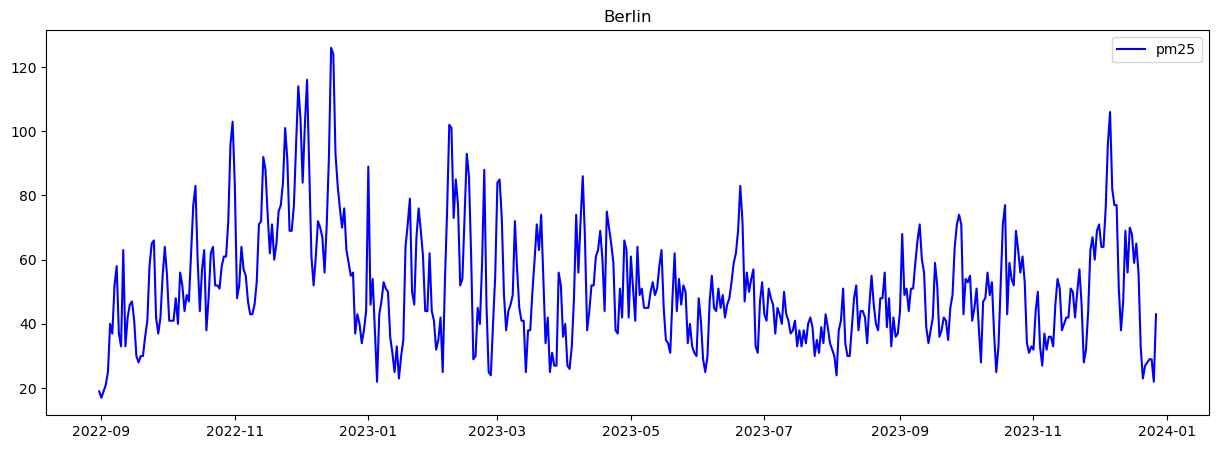

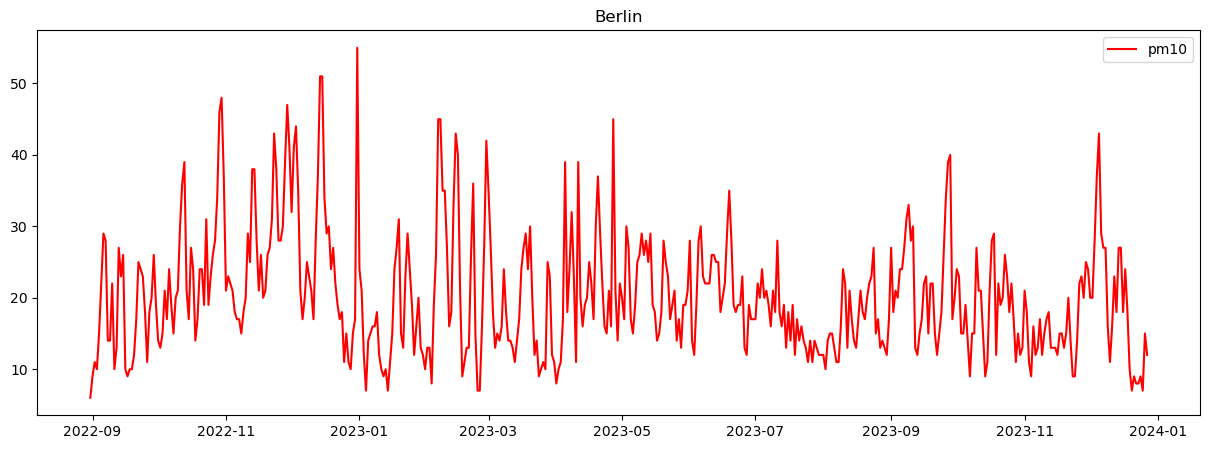

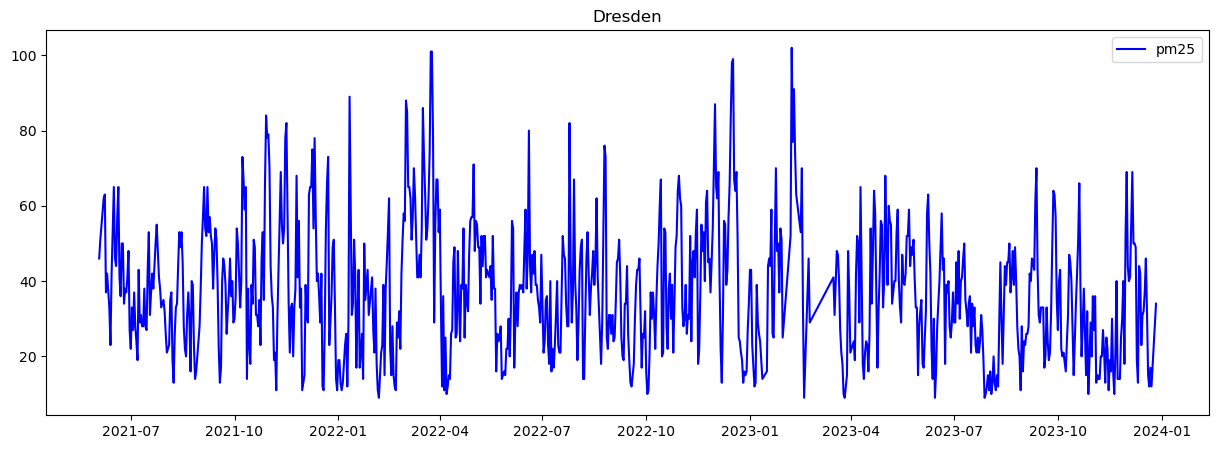

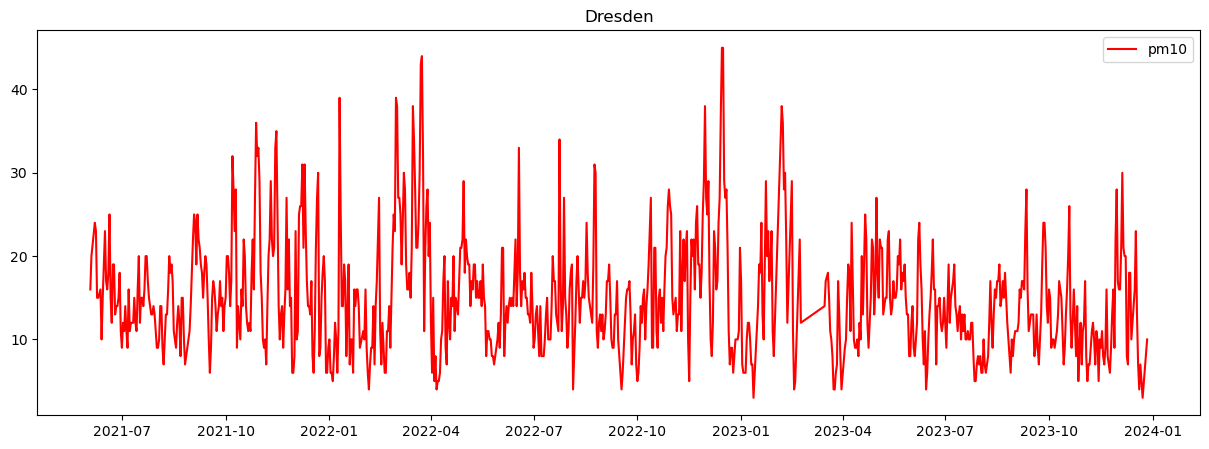

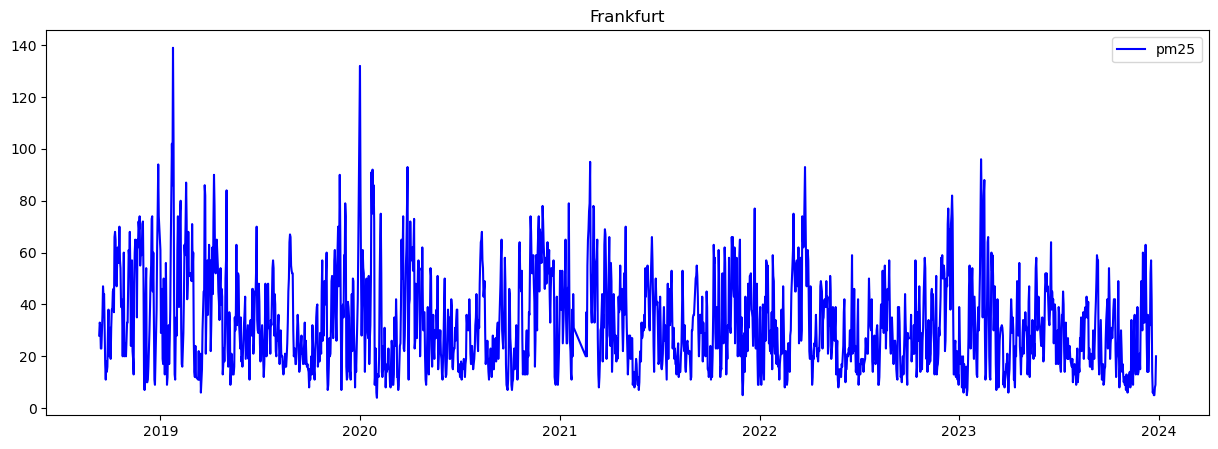

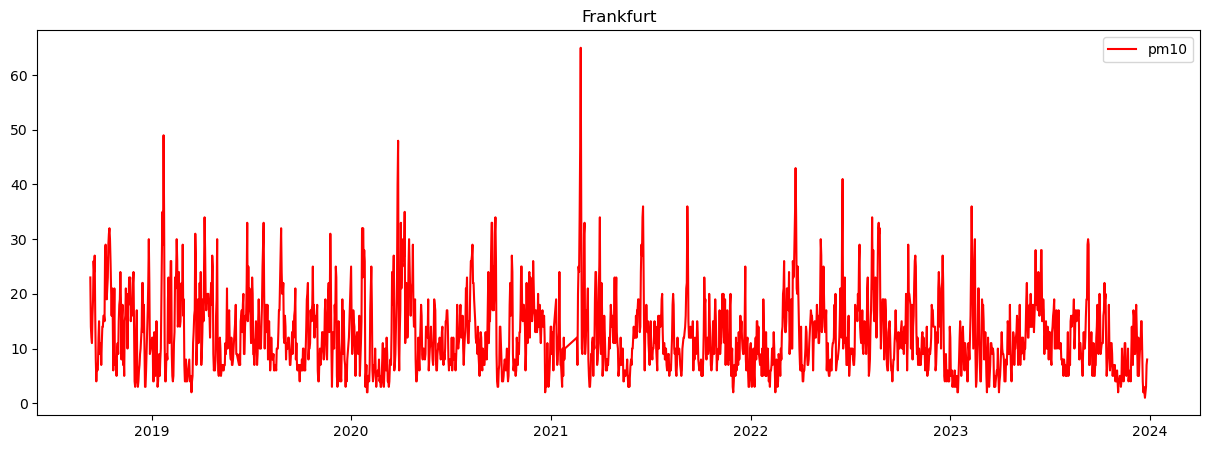

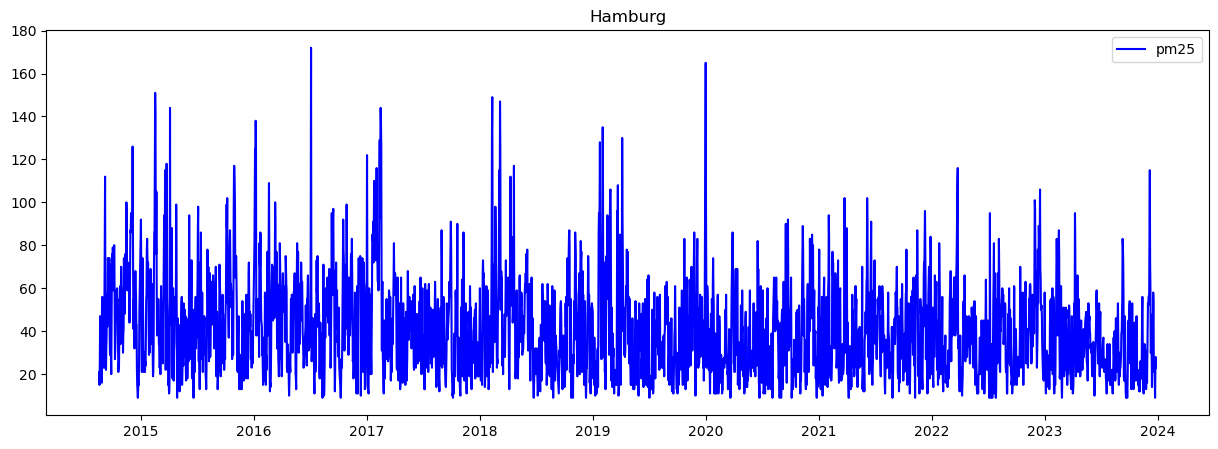

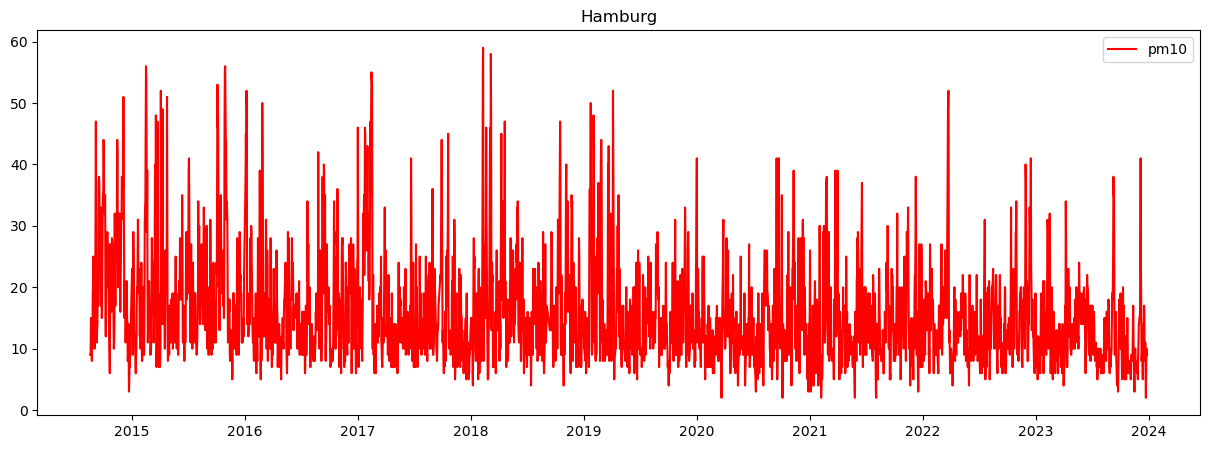

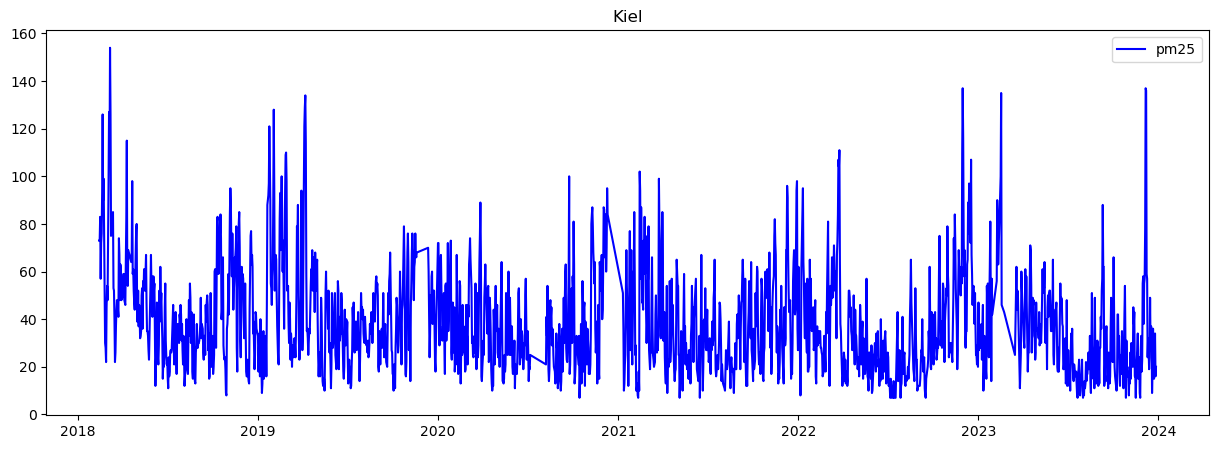

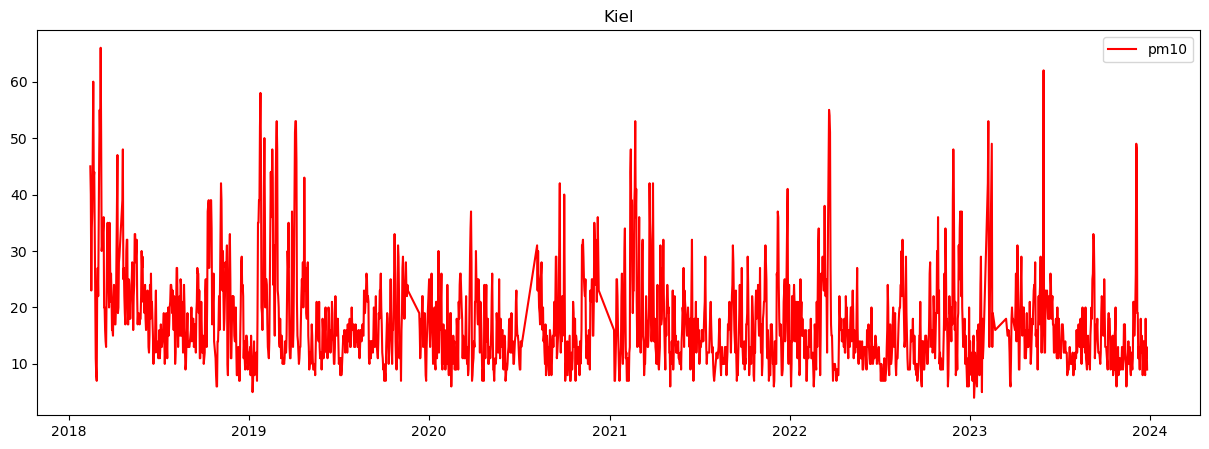

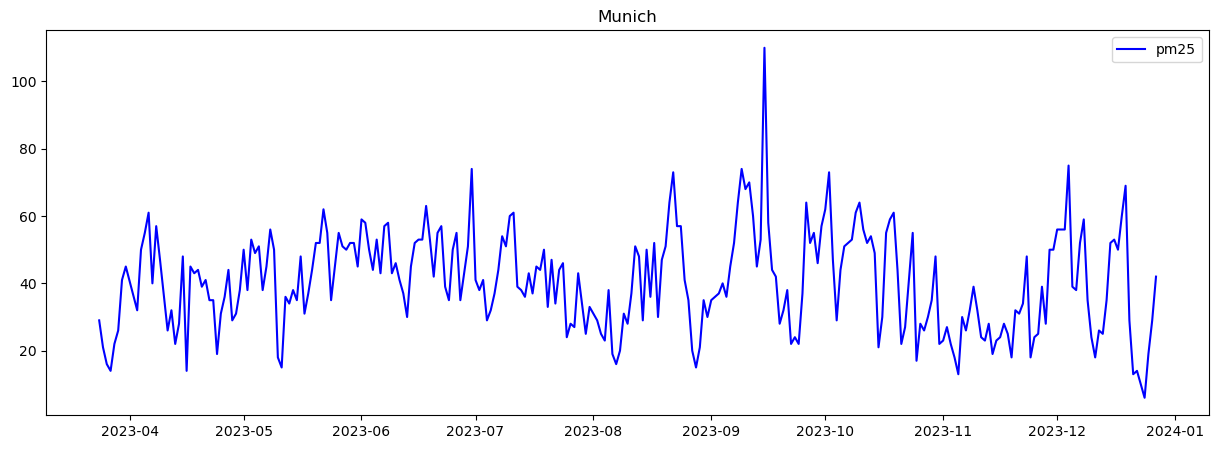

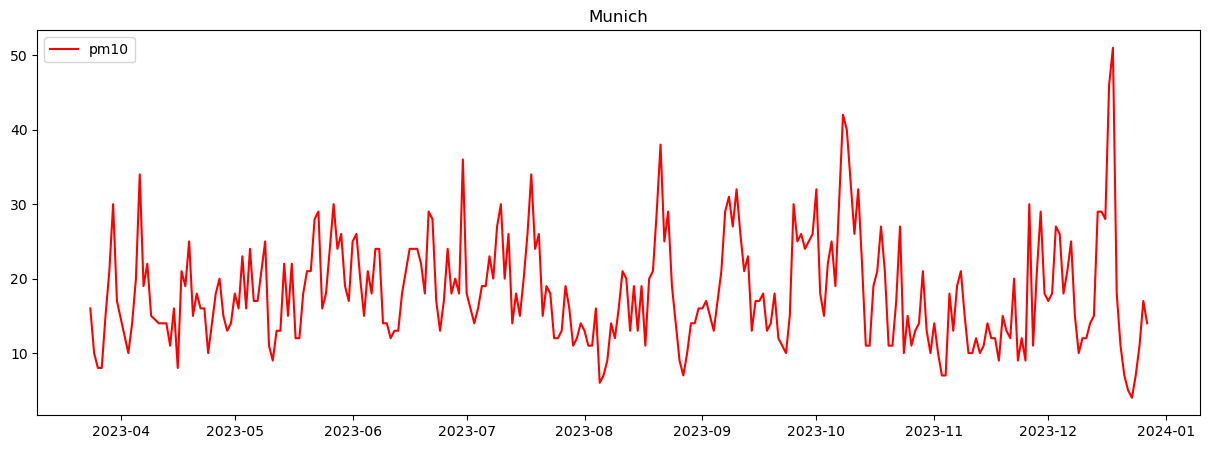

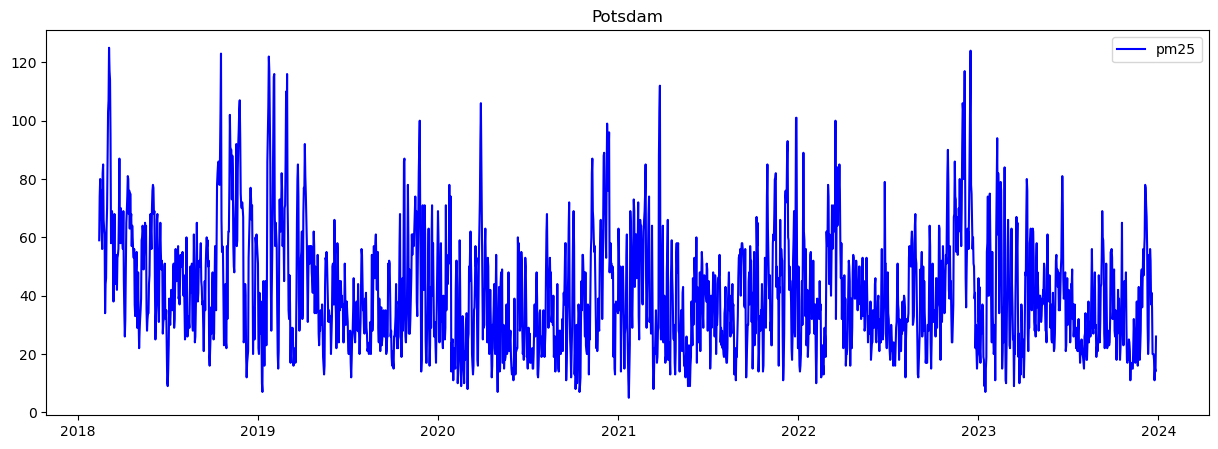

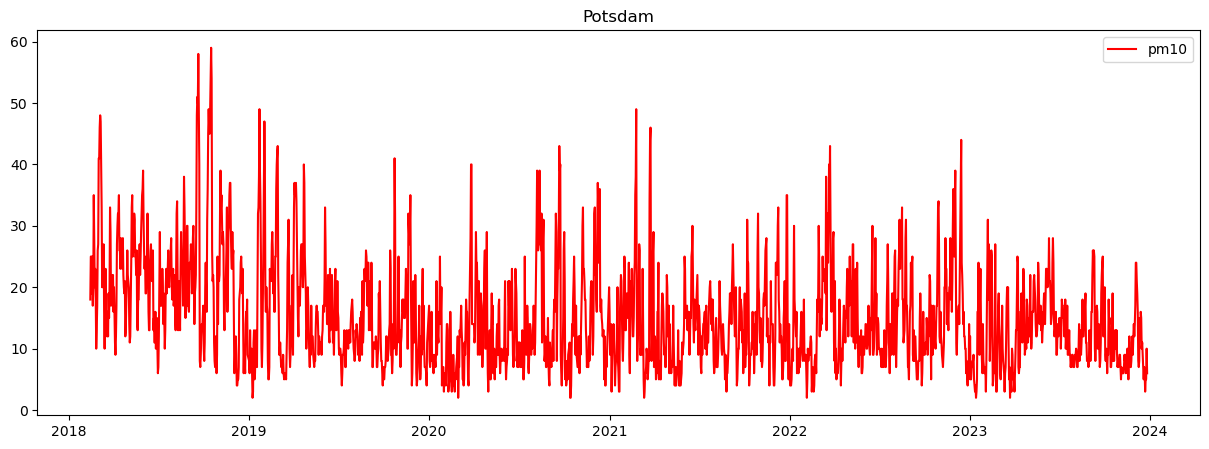

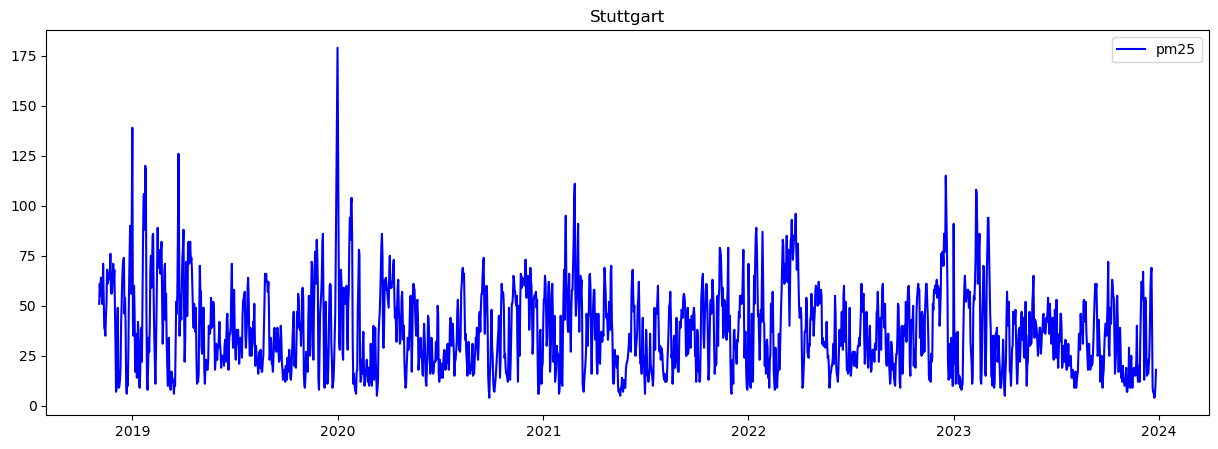

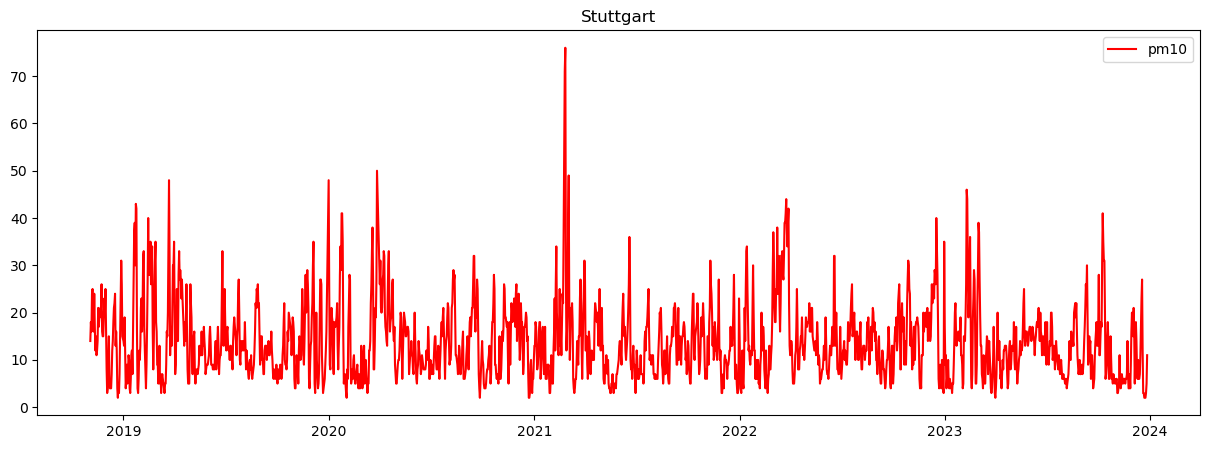

In [13]:
for city in np.unique(df_data_all_cities['city']):
    
    df_temp = df_data_all_cities[df_data_all_cities['city'] == city]

    plt.figure(figsize = (15, 5))
    plt.plot(df_temp['date'], df_temp['pm25'], color = 'blue', label = 'pm25')
    plt.title(f'{city}')
    plt.legend()
    plt.show()
    plt.figure(figsize = (15, 5))
    plt.plot(df_temp['date'], df_temp['pm10'], color = 'red', label = 'pm10')
    plt.title(f'{city}')
    plt.legend()
    plt.show()

In [14]:
# filter data for berlin
df_berlin = df_data_all_cities[df_data_all_cities['city'] == 'Berlin']

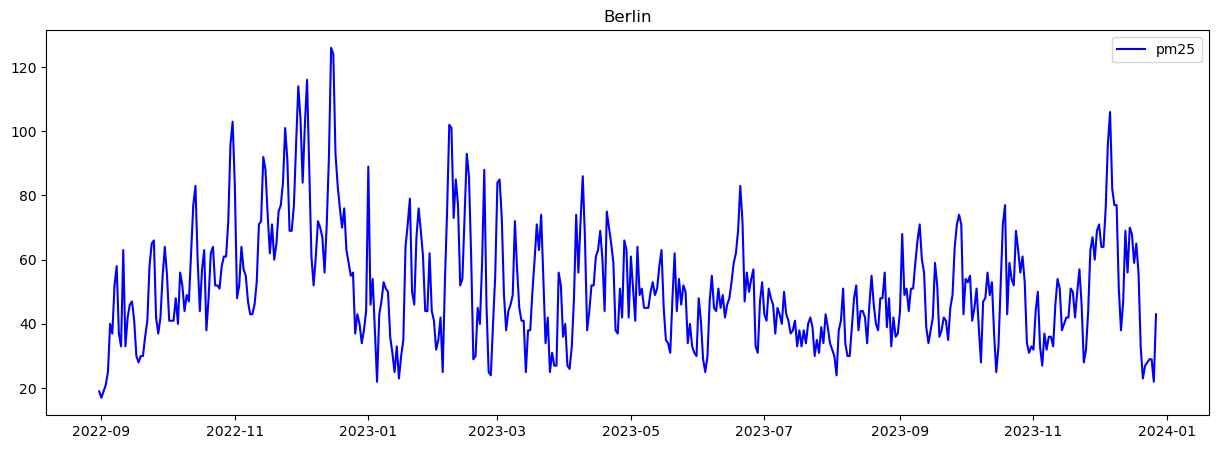

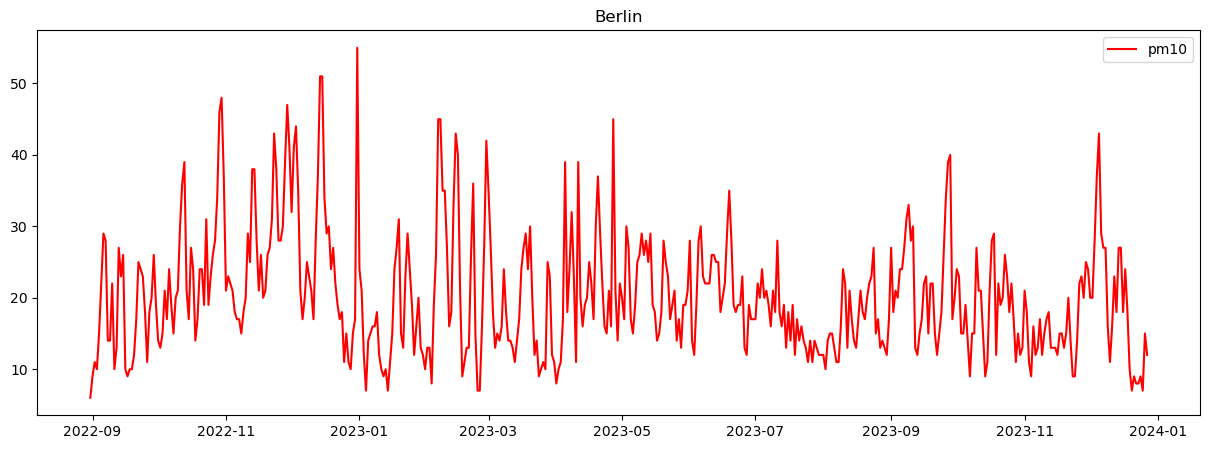

In [15]:
plt.figure(figsize = (15, 5))
plt.plot(df_berlin['date'], df_berlin['pm25'], color = 'blue', label = 'pm25')
plt.title('Berlin')
plt.legend()
plt.show()
plt.figure(figsize = (15, 5))
plt.plot(df_berlin['date'], df_berlin['pm10'], color = 'red', label = 'pm10')
plt.title('Berlin')
plt.legend()
plt.show()

In [16]:
df_berlin['date'] = pd.to_datetime(df_berlin['date'])
df_berlin = df_berlin.set_index('date')

C:\Users\shahe\AppData\Local\Temp\ipykernel_17072\3852948135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_berlin['date'] = pd.to_datetime(df_berlin['date'])


In [17]:
# Feature engineering: Extracting date-related features (you can add more if needed)
df_berlin['year'] = df_berlin.index.year
df_berlin['month'] = df_berlin.index.month
df_berlin['day'] = df_berlin.index.day

In [18]:
# Split the data into training and testing sets
train_size = int(len(df_berlin) * 0.8)
train_data, test_data = df_berlin[:train_size], df_berlin[train_size:]

In [19]:
# Define features and target variable
features = ['year', 'month', 'day']
target = 'pm25'  

In [20]:
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

In [21]:
# Train decision tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [22]:
# Train random forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)


RandomForestRegressor()

In [23]:
# Train the XGBoost regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
# Make predictions
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
# Make predictions on the testing set
xgb_preds = xgb_model.predict(X_test)

In [25]:
# Compare models using Mean Squared Error
mse_decision_tree = mean_squared_error(y_test, decision_tree_preds)
mse_random_forest = mean_squared_error(y_test, random_forest_preds)
mse_xg_boost = mean_squared_error(y_test, xgb_preds)

In [27]:
print(f'Mean Squared Error (Decision Tree): {mse_decision_tree}')
print(f'Mean Squared Error (Random Forest): {mse_random_forest}')
print(f'Mean Squared Error (XgBoost): {mse_xg_boost}')

Mean Squared Error (Decision Tree): 798.4123711340206
Mean Squared Error (Random Forest): 707.4094175257733
Mean Squared Error (XgBoost): 781.2410469329255


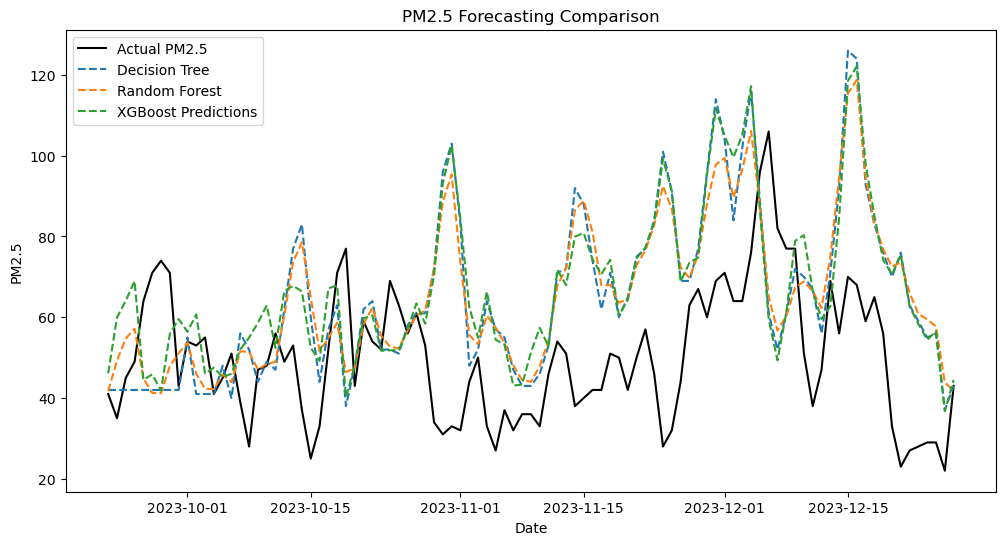

In [28]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual PM2.5', color='black')
plt.plot(test_data.index, decision_tree_preds, label='Decision Tree', linestyle='dashed')
plt.plot(test_data.index, random_forest_preds, label='Random Forest', linestyle='dashed')
plt.plot(test_data.index, xgb_preds, label='XGBoost Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('PM2.5 Forecasting Comparison')
plt.legend()
plt.show()

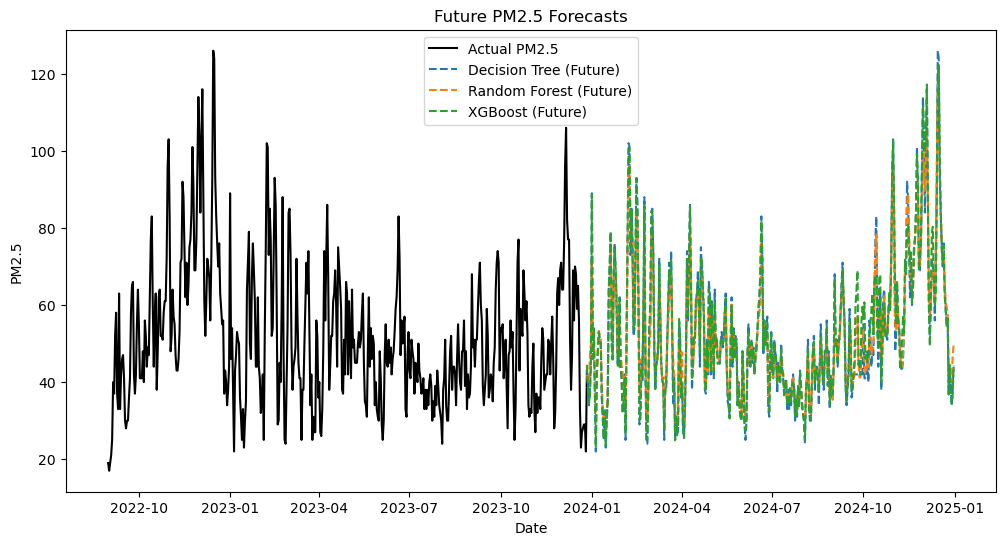

In [29]:
# Extend the time range for future forecasts (replace 'end_date' with the desired end date)
end_date = '2024-12-31'
future_dates = pd.date_range(start=df_berlin.index[-1], end=end_date, freq='D')

# Create a DataFrame with the extended time range
future_data = pd.DataFrame(index=future_dates)

# Feature engineering for future data (add year, month, day, etc. as needed)
future_data['year'] = future_data.index.year
future_data['month'] = future_data.index.month
future_data['day'] = future_data.index.day

# Make future predictions using the trained models
decision_tree_future_preds = decision_tree_model.predict(future_data[['year', 'month', 'day']])
random_forest_future_preds = random_forest_model.predict(future_data[['year', 'month', 'day']])
xgb_future_preds = xgb_model.predict(future_data[['year', 'month', 'day']])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_berlin.index, df_berlin['pm25'], label='Actual PM2.5', color='black')
plt.plot(future_data.index, decision_tree_future_preds, label='Decision Tree (Future)', linestyle='dashed')
plt.plot(future_data.index, random_forest_future_preds, label='Random Forest (Future)', linestyle='dashed')
plt.plot(future_data.index, xgb_future_preds, label='XGBoost (Future)', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Future PM2.5 Forecasts')
plt.legend()
plt.show()